# Automatic Image Captioning

## Dataset Exploration

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, we will explore this dataset, in preparation for the project.

## Step 1: Initializing the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that we will use to obtain the data.

In [3]:
!pip install pycocotools

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 109.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 88.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 108.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 97.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 kB 21.3 MB/s eta 0:00:00
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp310-cp310-linux_x86_64.whl size=94632 sha256=61220fff8532abfbb732c415cb8ce877983d17c89ed85145789f25ced07fcc08
  Stored in directory: /home/gi2570/.cache/pip/wheels/58/e6/f9/f87c8f8be098b51b616871315318329cae12cdb618f4caac93
Successfully built pycocotools


In [4]:
import os
import sys

from pycocotools.coco import COCO

# initialize COCO API for instance annotations
# path to cocoapi directory

data_dir = '/home/gi2570/coco'
data_type = "val2017"
instances_ann_file = os.path.join(
    data_dir, "annotations", f"instances_{data_type}.json"
)
coco = COCO(instances_ann_file)

# initialize COCO API for caption annotations
captions_ann_file = os.path.join(data_dir, "annotations", f"captions_{data_type}.json")
coco_caps = COCO(captions_ann_file)

# get image ids
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=0.78s)
creating index...
index created!
loading annotations into memory...
Done (t=0.26s)
creating index...
index created!


In [ ]:
coco.anns

## Step 2: Plotting a Sample Image

Next, I plot a random image from the dataset, along with its five corresponding captions.  Each time the code cell below is run, a different image is selected.  

In the project, I will use this dataset to train the model to generate captions from images!

In [10]:
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 33.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 113.0 MB/s eta 0:00:0000:01


{'license': 4, 'file_name': '000000030213.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000030213.jpg', 'height': 449, 'width': 640, 'date_captured': '2013-11-14 19:03:42', 'flickr_url': 'http://farm9.staticflickr.com/8376/8561578295_08827d4611_z.jpg', 'id': 30213}
http://images.cocodataset.org/val2017/000000030213.jpg


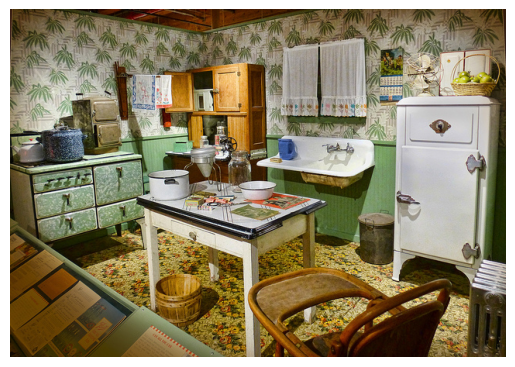

A kitchen filled with a stove top oven and a refrigerator.
The picture shows the interior of a kitchen, with vintage refrigerator, stove, and other appliances.
Kitchen with many old appliances and many pots and pans.
The kitchen features an old fashioned center island.
A kitchen has an island, icebox, and sink in it.


In [11]:
import numpy as np
import skimage
import skimage.io as io
import matplotlib.pyplot as plt

%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]["image_id"]
img = coco.loadImgs(img_id)[0]
url = img["coco_url"]

print(img)
# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis("off")
plt.imshow(I)
plt.show()

# load and display captions
ann_ids = coco_caps.getAnnIds(imgIds=img["id"])
anns = coco_caps.loadAnns(ann_ids)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, I will use this dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  I'll tell more about how to design the architecture in the next notebook in the sequence (**1. Preliminaries.ipynb**).